<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_isco3/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02_データビューイング
- 「データ前処理」で保存したデータを読み込み、可視化して分析の方針を考察してみましょう。

---

### 🌐 参考サイト
#### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)

---
---

### ⬇️ ライブラリのインストール

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install matplotlib-fontja

### 📁 GoogleDrive の Mount

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

### ➜]　ライブラリのimport

In [1]:
import numpy as np # 数値演算ライブラリ
import pandas as pd # データ分析ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # 可視化ライブラリ
import joblib # モデル保存・読み込みライブラリ
from sklearn.preprocessing import LabelEncoder # 文字データを数字に置換するクラス（後述）
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割関数
from sklearn import linear_model # scikit-learnのlinear_modelライブラリ
from sklearn.ensemble import RandomForestRegressor  # RandomForestRegressor (回帰モデル)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 回帰モデルの性能評価用関数

### ✍️ 定数の定義
- データファイルパスを定義しておきます
- データ読み込み・データ書き込みの際に使用してください。修正は不要です

In [2]:
# 前処理後の出力ファイルパス定義
TIPS_PREPROCESSED_CSV = "./data/tips_preprocessed.csv"
MEDICAL_PREPROCESSED_CSV = "./data/medical_preprocessed.csv"

# RANDOM SEED 定義
RANDOM_SEED = 0

---
---
---

### 🗺️ サンプルプログラム4　相関係数の確認

以下の手順で、レストランチップ額データセットの相関係数を確認します。
- 前処理済みのチップ額データセットをDataFrameに読み込む(TIPS_PREPROCESSED_CSVで定義済みのファイル名を使用する)
- 'total_bill','size','tip'の３つのカラムについて、corr()関数を用いて相関係数を求める。
- seaborn の heatmap() 関数を用いて可視化する
- 考察を記載する

In [ ]:
# 前処理済みのデータセットを読み込む
df_tips = pd.read_csv(TIPS_PREPROCESSED_CSV, index_col=0) # 0番の列をindexに使用するため、index_col=0を指定します

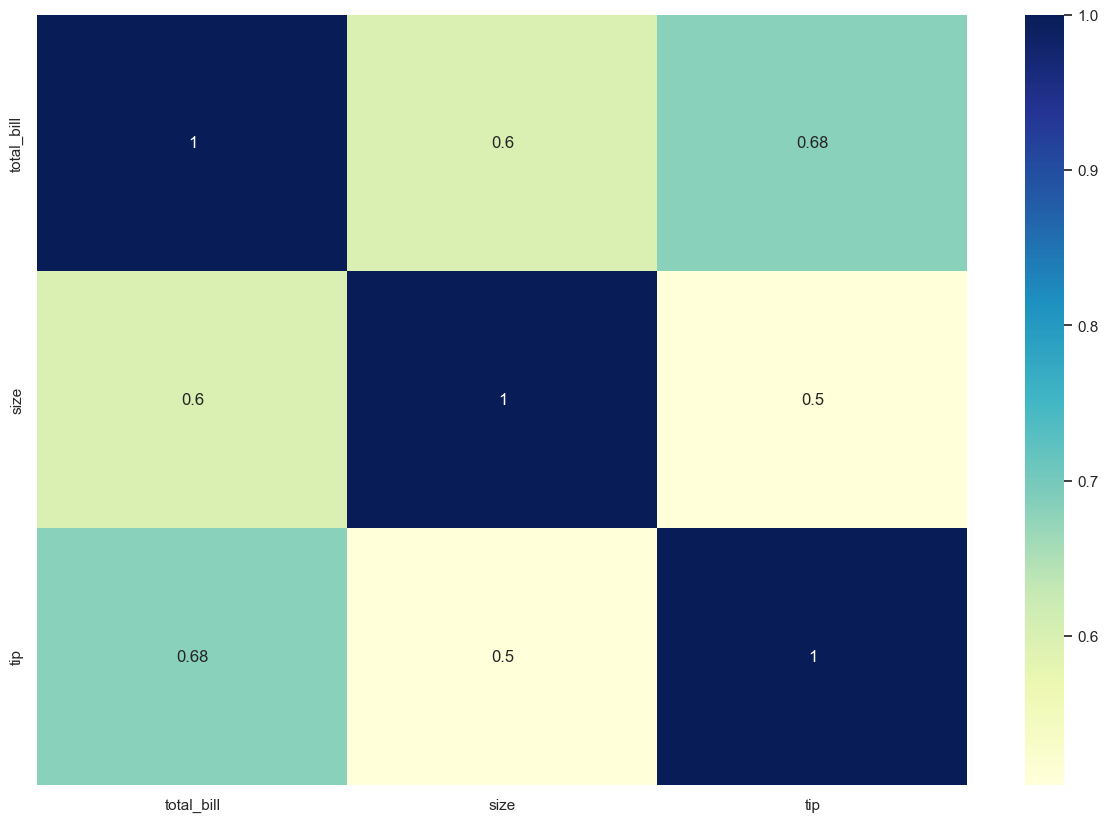

In [5]:
# 相関行列ヒートマップの表示
sns.set_theme(rc={'figure.figsize':(15,10)})
sns.heatmap(df_tips.loc[:,['total_bill','size','tip']].corr(), annot=True, cmap="YlGnBu") # カテゴリカル変数は除いて表示
plt.show()

### 考察
- ある程度強い相関はあるものの、かなり強い相関とまでは言えないぐらいの相関。
- total_billにtipが影響するのも理解できるし、size(人数)がtotal_billに影響するのも理解できるため、ある程度納得の行く結果と言える。

---

### 🗺️ 練習プログラム4　相関係数の確認 (10点)

以下の手順で、医療保険料データセットの相関係数を確認してみましょう。  
1️⃣ 前処理済みの医療保険料データセットをDataFrameに読み込む(MEDICAL_PREPROCESSED_CSVで定義済みのファイル名を使用する)  
2️⃣ 'age','bmi','children','charges' の４つのカラムについて、corr()関数を用いて相関係数を求める。  
3️⃣ seaborn の heatmap() 関数を用いて可視化する  
4️⃣ 考察を記載する  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->

In [6]:
# 前処理済みのデータセットを読み込む
df_medical = pd.read_csv(MEDICAL_PREPROCESSED_CSV, index_col=0) # 0番の列をindexに使用するため、index_col=0を指定します

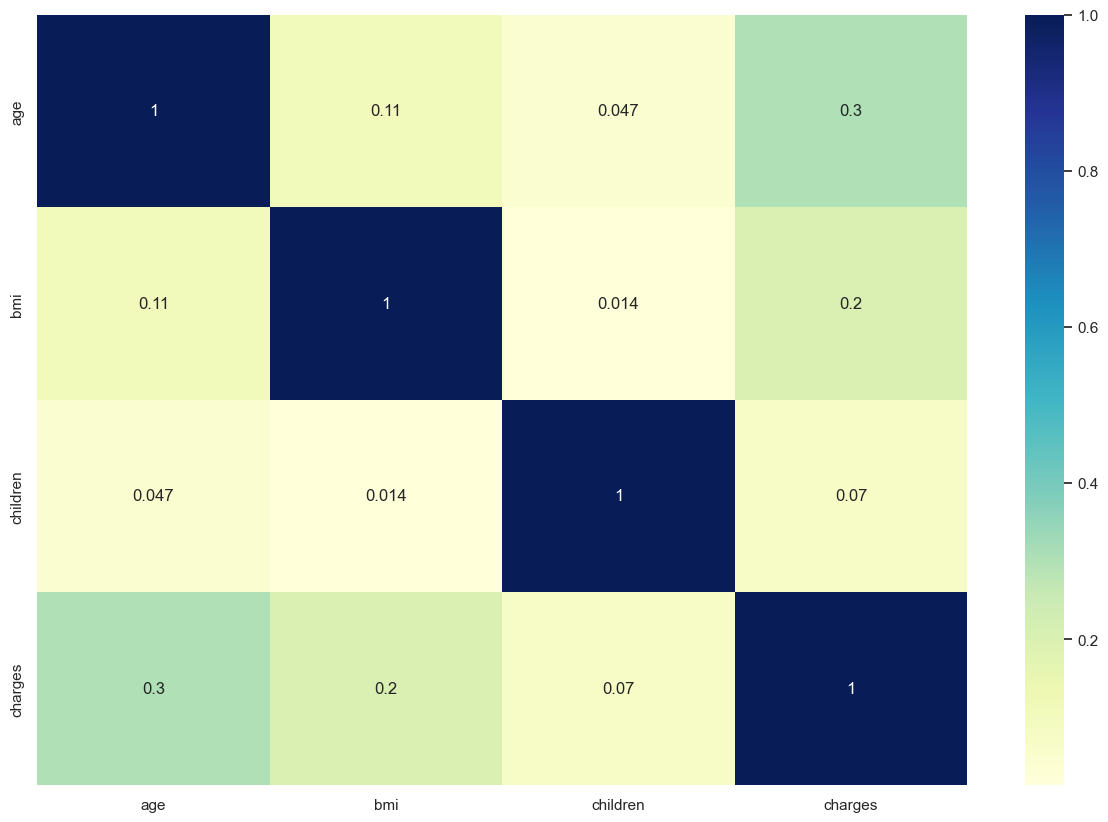

In [7]:
sns.set_theme(rc={'figure.figsize':(15,10)})
sns.heatmap(df_medical.loc[:,['age','bmi','children','charges']].corr(), annot=True, cmap="YlGnBu") # カテゴリカル変数は除いて表示
plt.show()

### 考察
# ある程度相関はあるものの、強いとまでは言えないぐらいの相関。
# ageとbmiにchargesが影響するのも理解できる。ある程度納得の行く結果と言えるが、もう少し相関があると良かった。

In [ ]:
#@title 送信処理用共通プログラム（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown 解答の送信に必要です。（中身は絶対に修正しないでください）

import os
# os.makedirs(".client/python", exist_ok=True)  # 隠しフォルダを作成
# !wget -q https://raw.githubusercontent.com/YasuharuSuzuki/25_isco3/main/91_notebook_client/src/setup.sh -O .client/setup.sh   # 外部コードをダウンロードして隠しフォルダに配置
# !chmod +x ./.client/setup.sh
# !bash ./.client/setup.sh # 実行

# sandbox実行用
# os.symlink("../../src", ".client", target_is_directory=True)
!bash ./sandbox_setup.sh # 実行

# モジュールの初期化
exec(open('.client/client_setup.py').read())

# ノートブック固有の設定
NOTEBOOK_PATH = "05_機械学習(回帰)/02_データビューイング.ipynb"
set_notebook_config(NOTEBOOK_PATH)

In [ ]:
#@title 問4 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=4, button_name="練習プログラム"))

---
---
---

### 📊 サンプルプログラム5 ヒストグラムの確認

- 'total_bill','size','tip'の３つのカラムについて、hist()関数を用いてヒストグラムを可視化する。
- 考察を記載する

<Axes: >

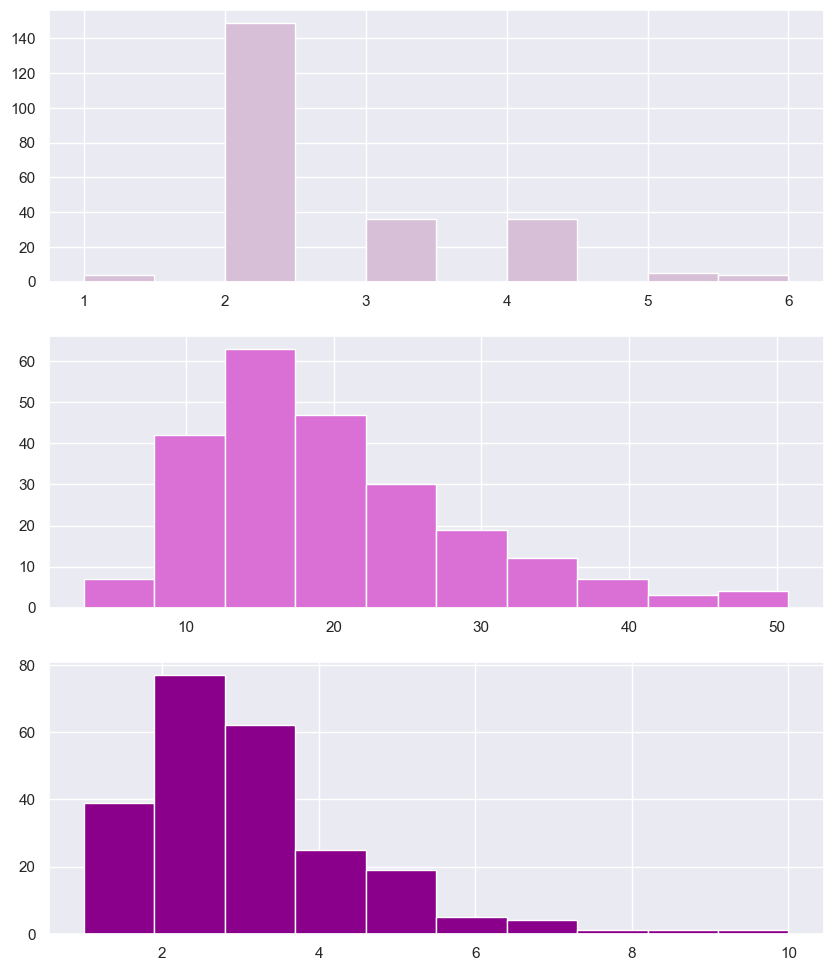

In [8]:
# ヒストグラムの表示
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
df_tips['size'].hist(color='thistle', ax=axes[0])
df_tips['total_bill'].hist(color='orchid', ax=axes[1])
df_tips['tip'].hist(color='darkmagenta', ax=axes[2])

### 考察
- 裾野が広い分布のため、正規分布と仮定して外れ値を除去するのは辞めておいたほうが良さそうです

---

### 📊 練習プログラム5 ヒストグラムの確認 (5点)

医療保険料のデータセットをヒストグラムで可視化し、それぞれ考察を付けてみましょう。    
※読み込み済みのDataFrameを活用しましょう。  

1️⃣ 'age','bmi','charges'の３つのカラムについて、hist()関数を用いてヒストグラムを可視化してみましょう。  
2️⃣ 考察を記載する  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->

<Axes: >

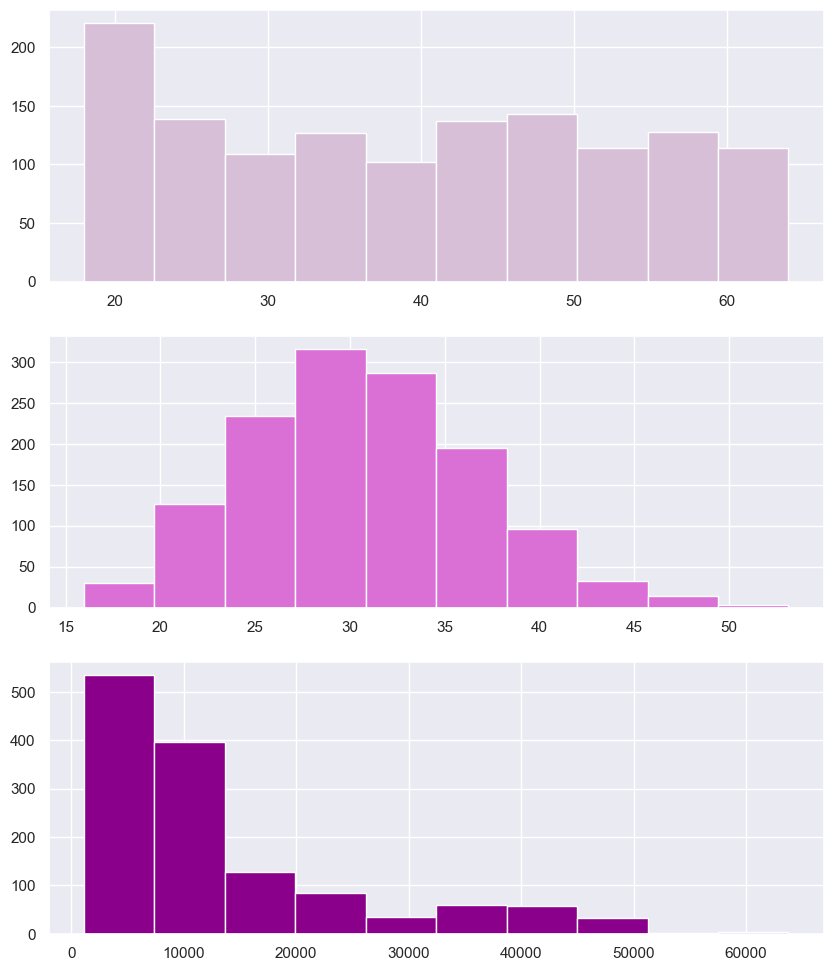

In [9]:
# ヒストグラムの表示
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
df_medical['age'].hist(color='thistle', ax=axes[0])
df_medical['bmi'].hist(color='orchid', ax=axes[1])
df_medical['charges'].hist(color='darkmagenta', ax=axes[2])

### 考察
# ageは一様分布、bmiはほぼ正規分布、chargesはべき分布
# chargesは裾野が広い分布のため、分布を仮定して外れ値を除去するのは辞めておいたほうが良さそうです

In [ ]:
#@title 問5 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=5, button_name="練習プログラム"))

---
---
---

### ⛰️ サンプルプログラム6 多変量連関図の表示

- 性別(sex)で層別して、'total_bill','size','tip'について多変量連関図をplotしてみましょう。
- 喫煙者かどうか(smoker)で層別して、'total_bill','size','tip'について多変量連関図をplotしてみましょう。
- 曜日(day)で層別して、'total_bill','size','tip'について多変量連関図をplotしてみましょう。
- 昼間か夜か(time)で層別して、'total_bill','size','tip'について多変量連関図をplotしてみましょう。
- それぞれ考察を記載してみましょう。

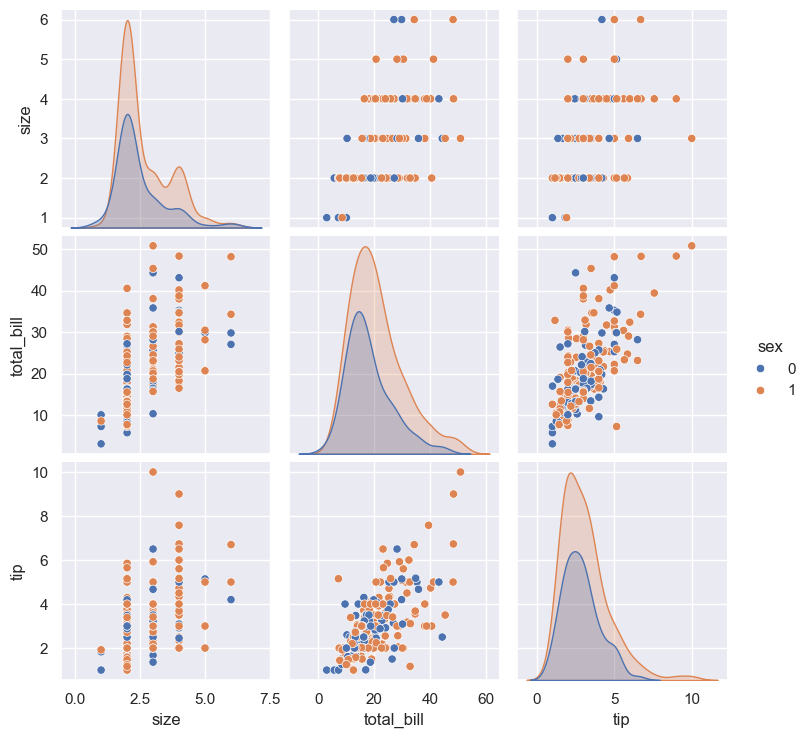

In [10]:
# 性別で層別してplot
sns.pairplot(df_tips[['size','total_bill','tip','sex']], hue='sex')

### 考察
- 男性の4名の支払い数がやや特徴的な分布あり
  - 家族で来ている時に支払いを男性が行っているケースが多い可能性

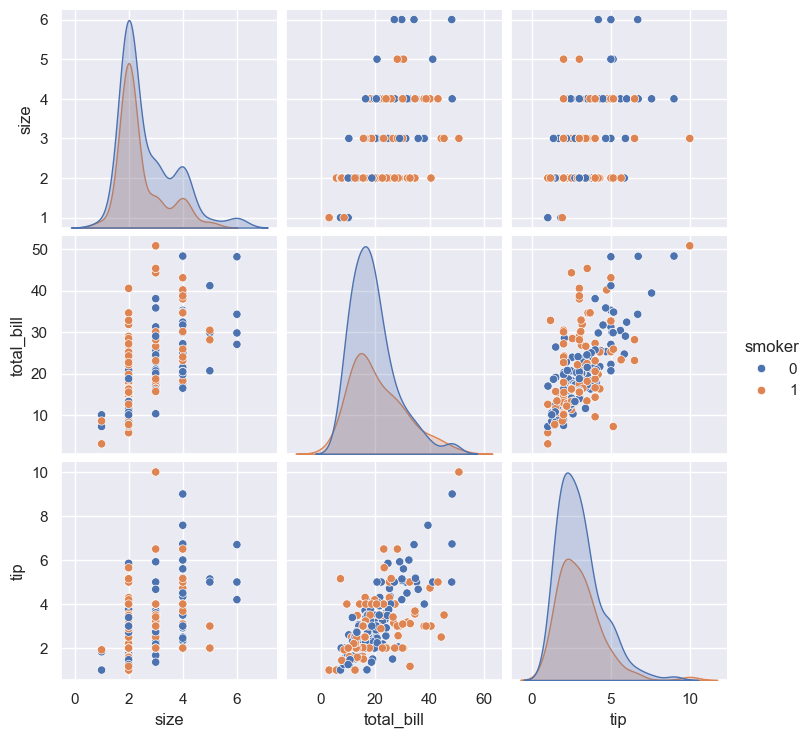

In [11]:
# 喫煙者かどうかで層別してplot
sns.pairplot(df_tips[['size','total_bill','tip','smoker']], hue='smoker')

### 考察
- 喫煙者かどうかで違いは見られない

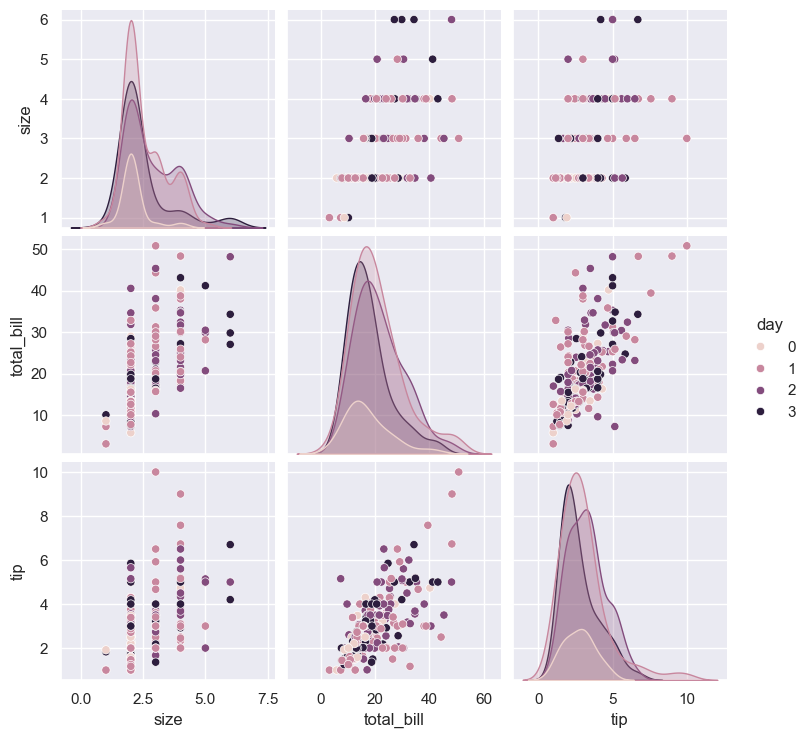

In [12]:
# 曜日で層別してplot
sns.pairplot(df_tips[['size','total_bill','tip','day']], hue='day')

### 考察
- 曜日によってsize(人数)にやや違いが見られる。

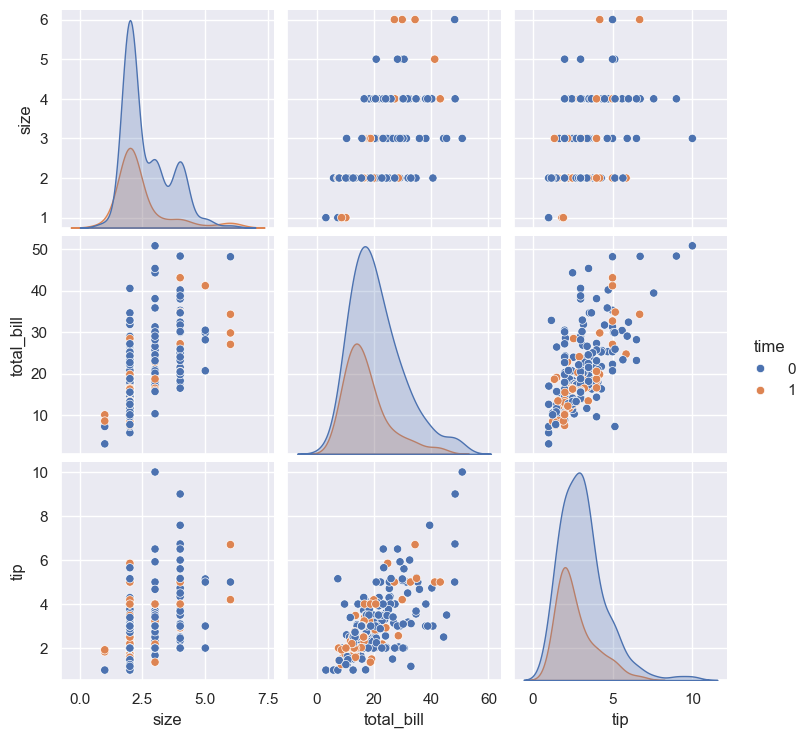

In [13]:
# 昼間か夜かで層別してplot
sns.pairplot(df_tips[['size','total_bill','tip','time']], hue='time')

### 考察
- sizeは夜間に4人での来店数が多めになる分布が見える
- tipは夜間の方がやや多め

---

### 🌊 練習プログラム6 多変量連関図の表示 (10点)

1️⃣ 性別(sex)で層別して、'age','bmi','children','charges'について多変量連関図をplotしてみましょう。  
2️⃣ 喫煙者かどうか(smoker)で層別して、'age','bmi','children','charges'について多変量連関図をplotしてみましょう。  
3️⃣ 地域(region)で層別して、'age','bmi','children','charges'について多変量連関図をplotしてみましょう。  
4️⃣ それぞれ考察を記載してみましょう。  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->

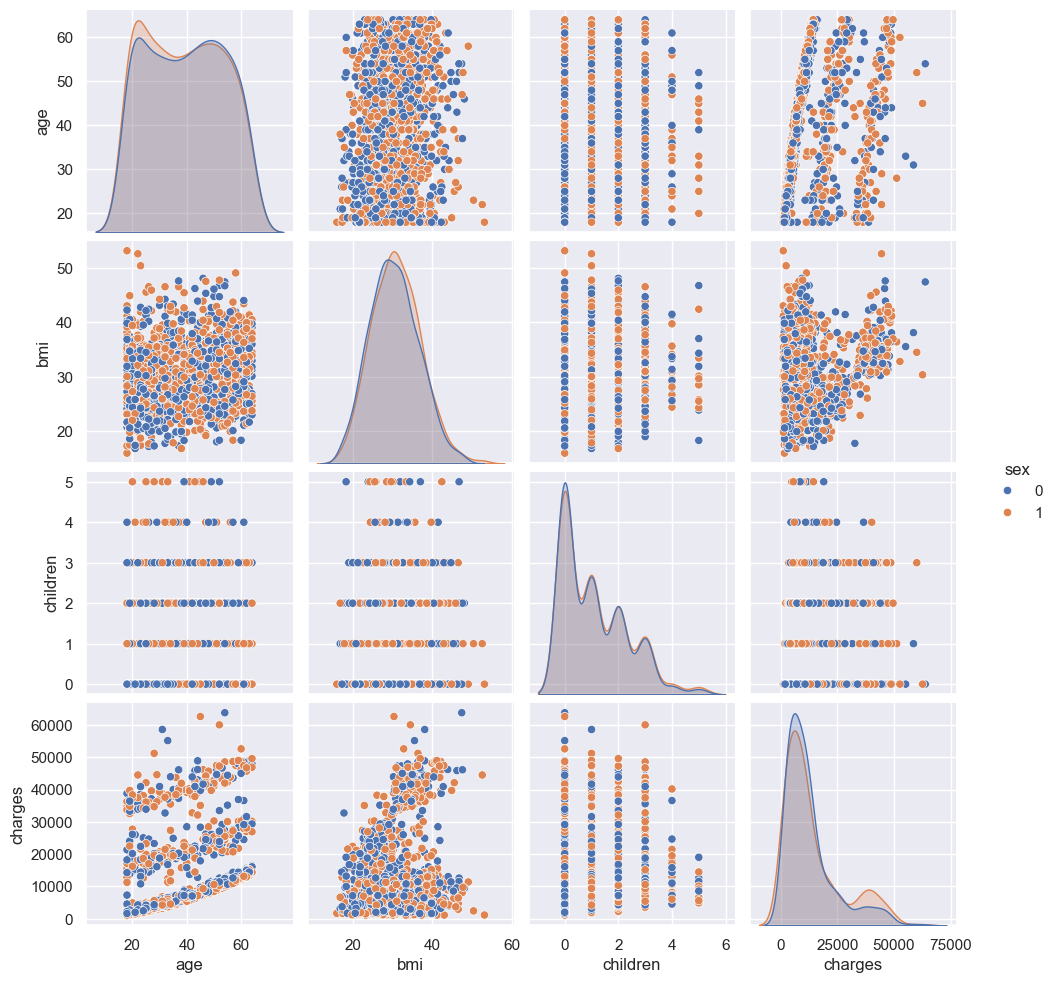

In [14]:
# 性別(sex)で層別してplot
sns.pairplot(df_medical[['age','bmi','children','charges','sex']], hue='sex')

# 考察
# 男女であまり差が見られないのですが、ageとchargesの分布が3階層になっているのすごく気になります

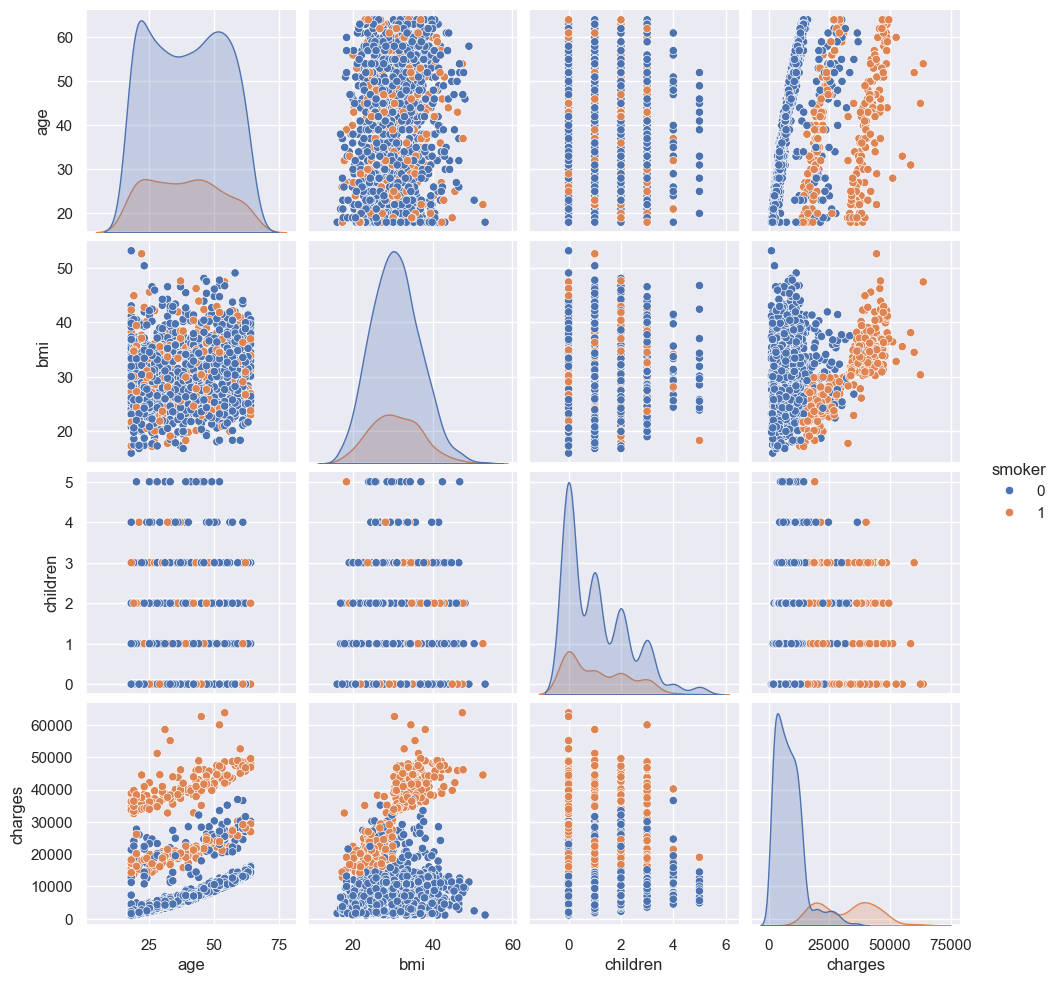

In [15]:
# 喫煙者かどうか(smoker)で層別してplot
sns.pairplot(df_medical[['age','bmi','children','charges','smoker']], hue='smoker')

# 考察
# ageとchargesの3階層のうち、2階層はsmokerの値がyesかnoかで明白に分かれそうです
# また、bmiとchargesの散布図では、smokerの値がyesのほうが全体的にchargesが高くなる傾向が見られます
# 総じて喫煙者は医療費(charges)が高くなる傾向があることがわかります

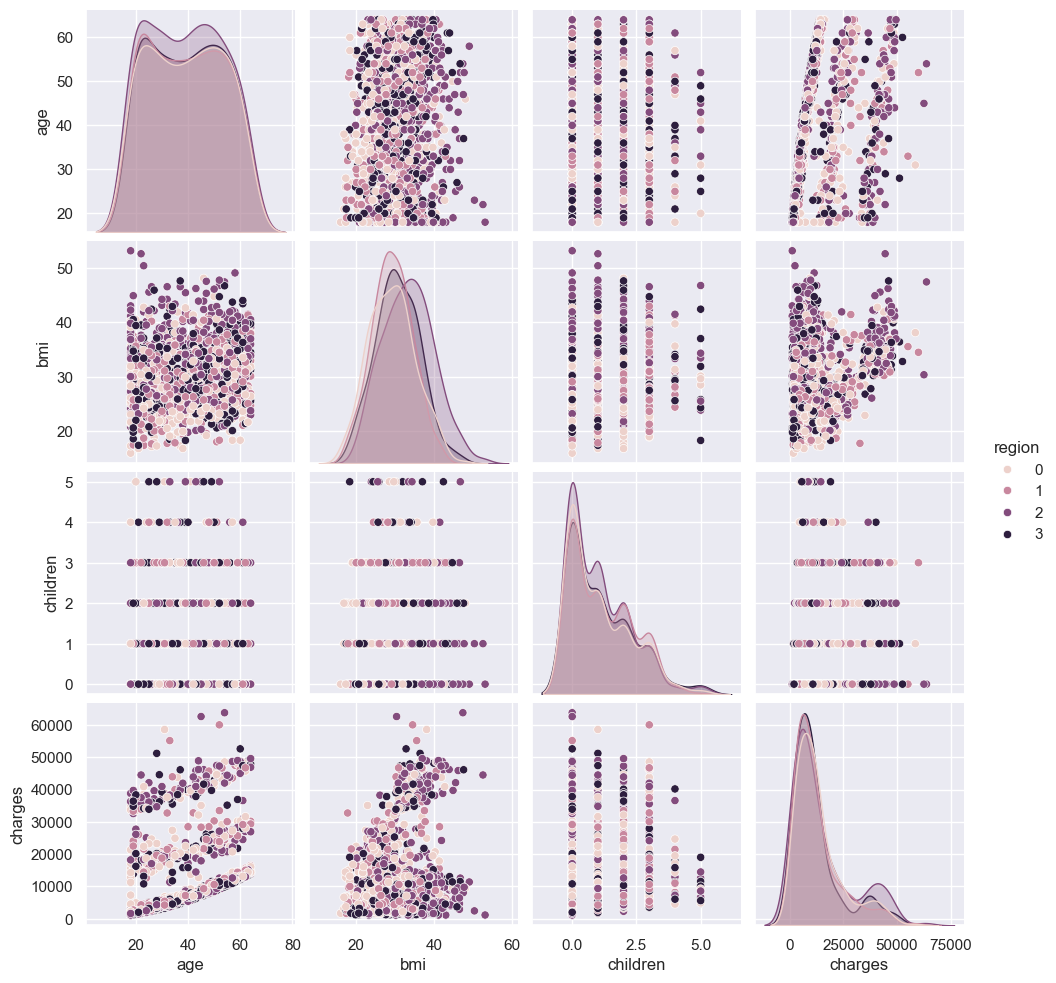

In [16]:
# 地域で層別してplot
sns.pairplot(df_medical[['age','bmi','children','charges','region']], hue='region')

# 考察
# 地域ではそれほど差が無さそうですね

In [ ]:
#@title 問6 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=6, button_name="練習プログラム"))